# Building your Deep Neural Network: Step by Step

Notation:

Superscript $[l]$ denotes a quantity associated with the $l^{th}$ layer.
Example: $a^{[L]}$ is the $L^{th}$ layer activation. $W^{[L]}$ and $b^{[L]}$ are the $L^{th}$ layer parameters.
Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example.
Example: $x^{(i)}$ is the $i^{th}$ training example.
Lowerscript $i$ denotes the $i^{th}$ entry of a vector.
Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the $l^{th}$ layer's activations).

In [17]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from testCases_v2 import *
from dnn_utils_v2 import sigmoid, relu, sigmoid_backward, relu_backward

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

3.1) - 2-layer NN

Linear->Relu->Linear->SIGMOID

In [18]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(1)
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    return parameters

parameters = initialize_parameters(2,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756]
 [-0.00528172 -0.01072969]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.00865408 -0.02301539]]
b2 = [[0.]]


In [19]:
def initialize_parameters_deep(layer_dims):
    # layer_dims :: list that contains the dimensions of each layer in our network
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)  # number of layers
    
    for l in range(1, L):
        parameters['W'+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01
        parameters['b'+str(l)] = np.zeros((layer_dims[l], 1))
        assert(parameters['W'+str(l)].shape == (layer_dims[l], layer_dims[l-1]))*0.01
        assert(parameters['b'+str(l)].shape == (layer_dims[l], 1))
    return parameters
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


In [20]:
def linear_forward(A, W, b):
    Z = np.dot(W, A) + b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    return Z, cache


A, W, b = linear_forward_test_case()
Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[ 3.26295337 -1.23429987]]


In [21]:
def linear_activation_forward(A_prev, W, b, activation):
    if activation == 'sigmoid':
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    elif activation == 'relu':
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert(A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)
    return A, cache


A_prev, W, b = linear_activation_forward_test_case()
A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))
A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


In [22]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2   ## integer division (W,b for every layer)
    
    ## we assume first layer to L-1 layer using ReLU, last layer L using Sigmoid
    
    # for 1 to L-1 layer
    for l in range(1, L): # not including L
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W'+str(l)], parameters['b'+str(l)], 'relu')
        caches.append(cache)
    # for layer L
    AL, cache = linear_activation_forward(A, parameters['W'+str(L)], parameters['b'+str(L)], 'sigmoid')
    caches.append(cache)
    
    assert(AL.shape == (1, X.shape[1]))
    
    return AL, caches

X, parameters = L_model_forward_test_case()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[0.17007265 0.2524272 ]]
Length of caches list = 2


5) COST FUNCTION

In [23]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = - 1/m * np.sum(Y * np.log(AL) + (1-Y) * np.log(1-AL))
    cost = np.squeeze(cost)
    
    assert(cost.shape == ())
    return cost

Y, AL = compute_cost_test_case()
print("cost = " + str(compute_cost(AL, Y)))

cost = 0.41493159961539694


In [24]:
def linear_backward(dZ, cache):
    ## for any layer l
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = 1/m * np.dot(dZ, A_prev.T)
    db = 1/m * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    
    assert(dA_prev.shape == A_prev.shape)
    assert(dW.shape == W.shape)
    assert(db.shape == b.shape)
    
    return dA_prev, dW, db


# Set up some test inputs
dZ, linear_cache = linear_backward_test_case()
dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))
    
    

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[0.50629448]]


In [25]:
def linear_activation_backward(dA, cache, activation):
    # linear_cache => A_prev, W, b
    # activation_cache => Z
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    elif activation == 'sigmoid':
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db


AL, linear_activation_cache = linear_activation_backward_test_case()
dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")
dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


In [26]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dAL = AL - Y
    current_cache = caches[L-1]
    grads['dA'+str(L)], grads['dW'+str(L)], grads['db'+str(L)] = linear_activation_backward(dAL, current_cache, 'sigmoid')

    for l in reversed(range(L-1)):
        print('l'+str(l))
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads['dA'+str(l+2)], current_cache, 'relu')
        grads['dA' + str(l+1)] = dA_prev_temp ## Z = W * A_prev + b  ==> here dAl => dA_prev
        grads['dW' + str(l+1)] = dW_temp
        grads['db' + str(l+1)] = db_temp
    
    return grads


AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dA1 = "+ str(grads["dA1"]))

 

l0
dW1 = [[0.10087189 0.0192033  0.03393989 0.02583208]
 [0.         0.         0.         0.        ]
 [0.01299615 0.00247412 0.00437275 0.00332816]]
db1 = [[-0.05413055]
 [ 0.        ]
 [-0.00697408]]
dA1 = [[ 0.          0.12853824]
 [ 0.         -0.08041233]
 [ 0.         -0.07888325]
 [ 0.         -0.18221184]]


6.4) Update Parameters

In [27]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters)//2
    
    for l in range(L):
        parameters['W'+str(l+1)] = parameters['W'+str(l+1)] - learning_rate * grads['dW'+str(l+1)]
        parameters['b'+str(l+1)] = parameters['b'+str(l+1)] - learning_rate * grads['db'+str(l+1)]
    return parameters

parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


# Use above model to test cat recognition data

In [28]:
import time
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v2 import *

y = 1. It is a cat picture.


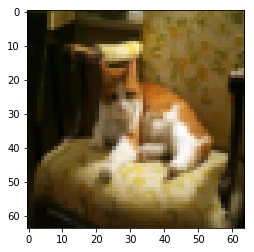

In [29]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

index = 7
plt.imshow(train_x_orig[index])
print('y = ' + str(train_y[0, index]) + '. It is a ' + classes[train_y[0, index]].decode('utf-8') + ' picture.')

In [30]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [31]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T
train_x = train_x_flatten/255
test_x = test_x_flatten/255

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [32]:
n_x = 12288
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912678
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605748
Cost after iteration 500: 0.5158304772764729
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.43391631512257495
Cost after iteration 800: 0.40079775362038844
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366413
Cost after iteration 1100: 0.30527536361962654
Cost after iteration 1200: 0.27491377282130164
Cost after iteration 1300: 0.2468176821061486
Cost after iteration 1400: 0.19850735037466108
Cost after iteration 1500: 0.17448318112556666
Cost after iteration 1600: 0.17080762978097128
Cost after iteration 1700: 0.11306524562164708
Cost after iteration 1800: 0.09629426845937153
Cost after iteration 1900: 0.08342617959726871
Cost after iteration 2000: 0.07439078704319085
Cost after iteration 2100: 0.0663074

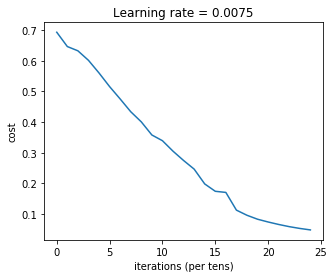

In [35]:
def  two_layer_model(X, Y, layer_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    grads = {}
    costs = []
    (n_x, n_h, n_y) = layer_dims
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    for i in range(0, num_iterations):
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        cost = compute_cost(A2, Y)
        
        dA2 = -(Y / A2 - (1 - Y) / (1 - A2))
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        parameters = update_parameters(parameters, grads, learning_rate)
        W1 = parameters['W1']
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']
        
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
            costs.append(cost)
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title('Learning rate = ' + str(learning_rate))
    plt.show()
    
    return parameters

parameters = two_layer_model(train_x, train_y, layer_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost = True)        
        

In [34]:
predictions_train = predict(train_x, train_y, parameters)

predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.9999999999999998
Accuracy: 0.72


Cost after iteration 0:0.7717493284237686
Cost after iteration 100:0.6720534400822914
Cost after iteration 200:0.6482632048575212
Cost after iteration 300:0.6115068816101354
Cost after iteration 400:0.5670473268366111
Cost after iteration 500:0.5401376634547801
Cost after iteration 600:0.5279299569455267
Cost after iteration 700:0.46547737717668514
Cost after iteration 800:0.369125852495928
Cost after iteration 900:0.39174697434805356
Cost after iteration 1000:0.31518698886006163
Cost after iteration 1100:0.2726998441789385
Cost after iteration 1200:0.23741853400268134
Cost after iteration 1300:0.19960120532208644
Cost after iteration 1400:0.18926300388463302
Cost after iteration 1500:0.16118854665827748
Cost after iteration 1600:0.14821389662363316
Cost after iteration 1700:0.13777487812972944
Cost after iteration 1800:0.1297401754919012
Cost after iteration 1900:0.12122535068005215
Cost after iteration 2000:0.1138206066863371
Cost after iteration 2100:0.10783928526254132
Cost after i

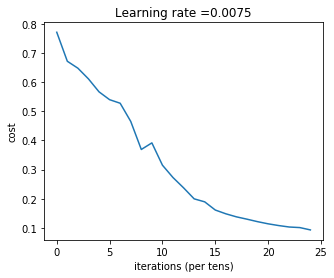

In [37]:
def L_layer_model(X, Y, layer_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost = False):
    np.random.seed(1)
    costs = []
    m = X.shape[1]
    
    parameters = initialize_parameters_deep(layer_dims)
    
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 100 == 0:
            print('Cost after iteration {}:{}'.format(i, np.squeeze(cost)))
            costs.append(cost)
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

layers_dims = [12288, 20, 7, 5, 1] #  5-layer model
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)


In [38]:
pred_train = predict(train_x, train_y, parameters)
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.9856459330143539
Accuracy: 0.8


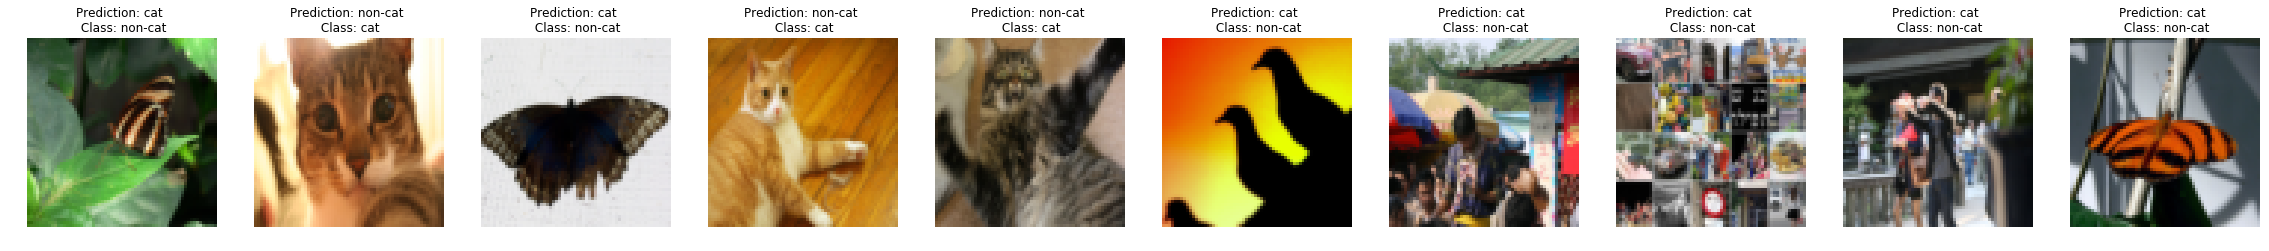

In [39]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

# Test your own image

C:\nbmetools\anaconda3\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
C:\nbmetools\anaconda3\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Accuracy: 1.0
y = 1.0, your L-layer model predicts a "cat" picture.


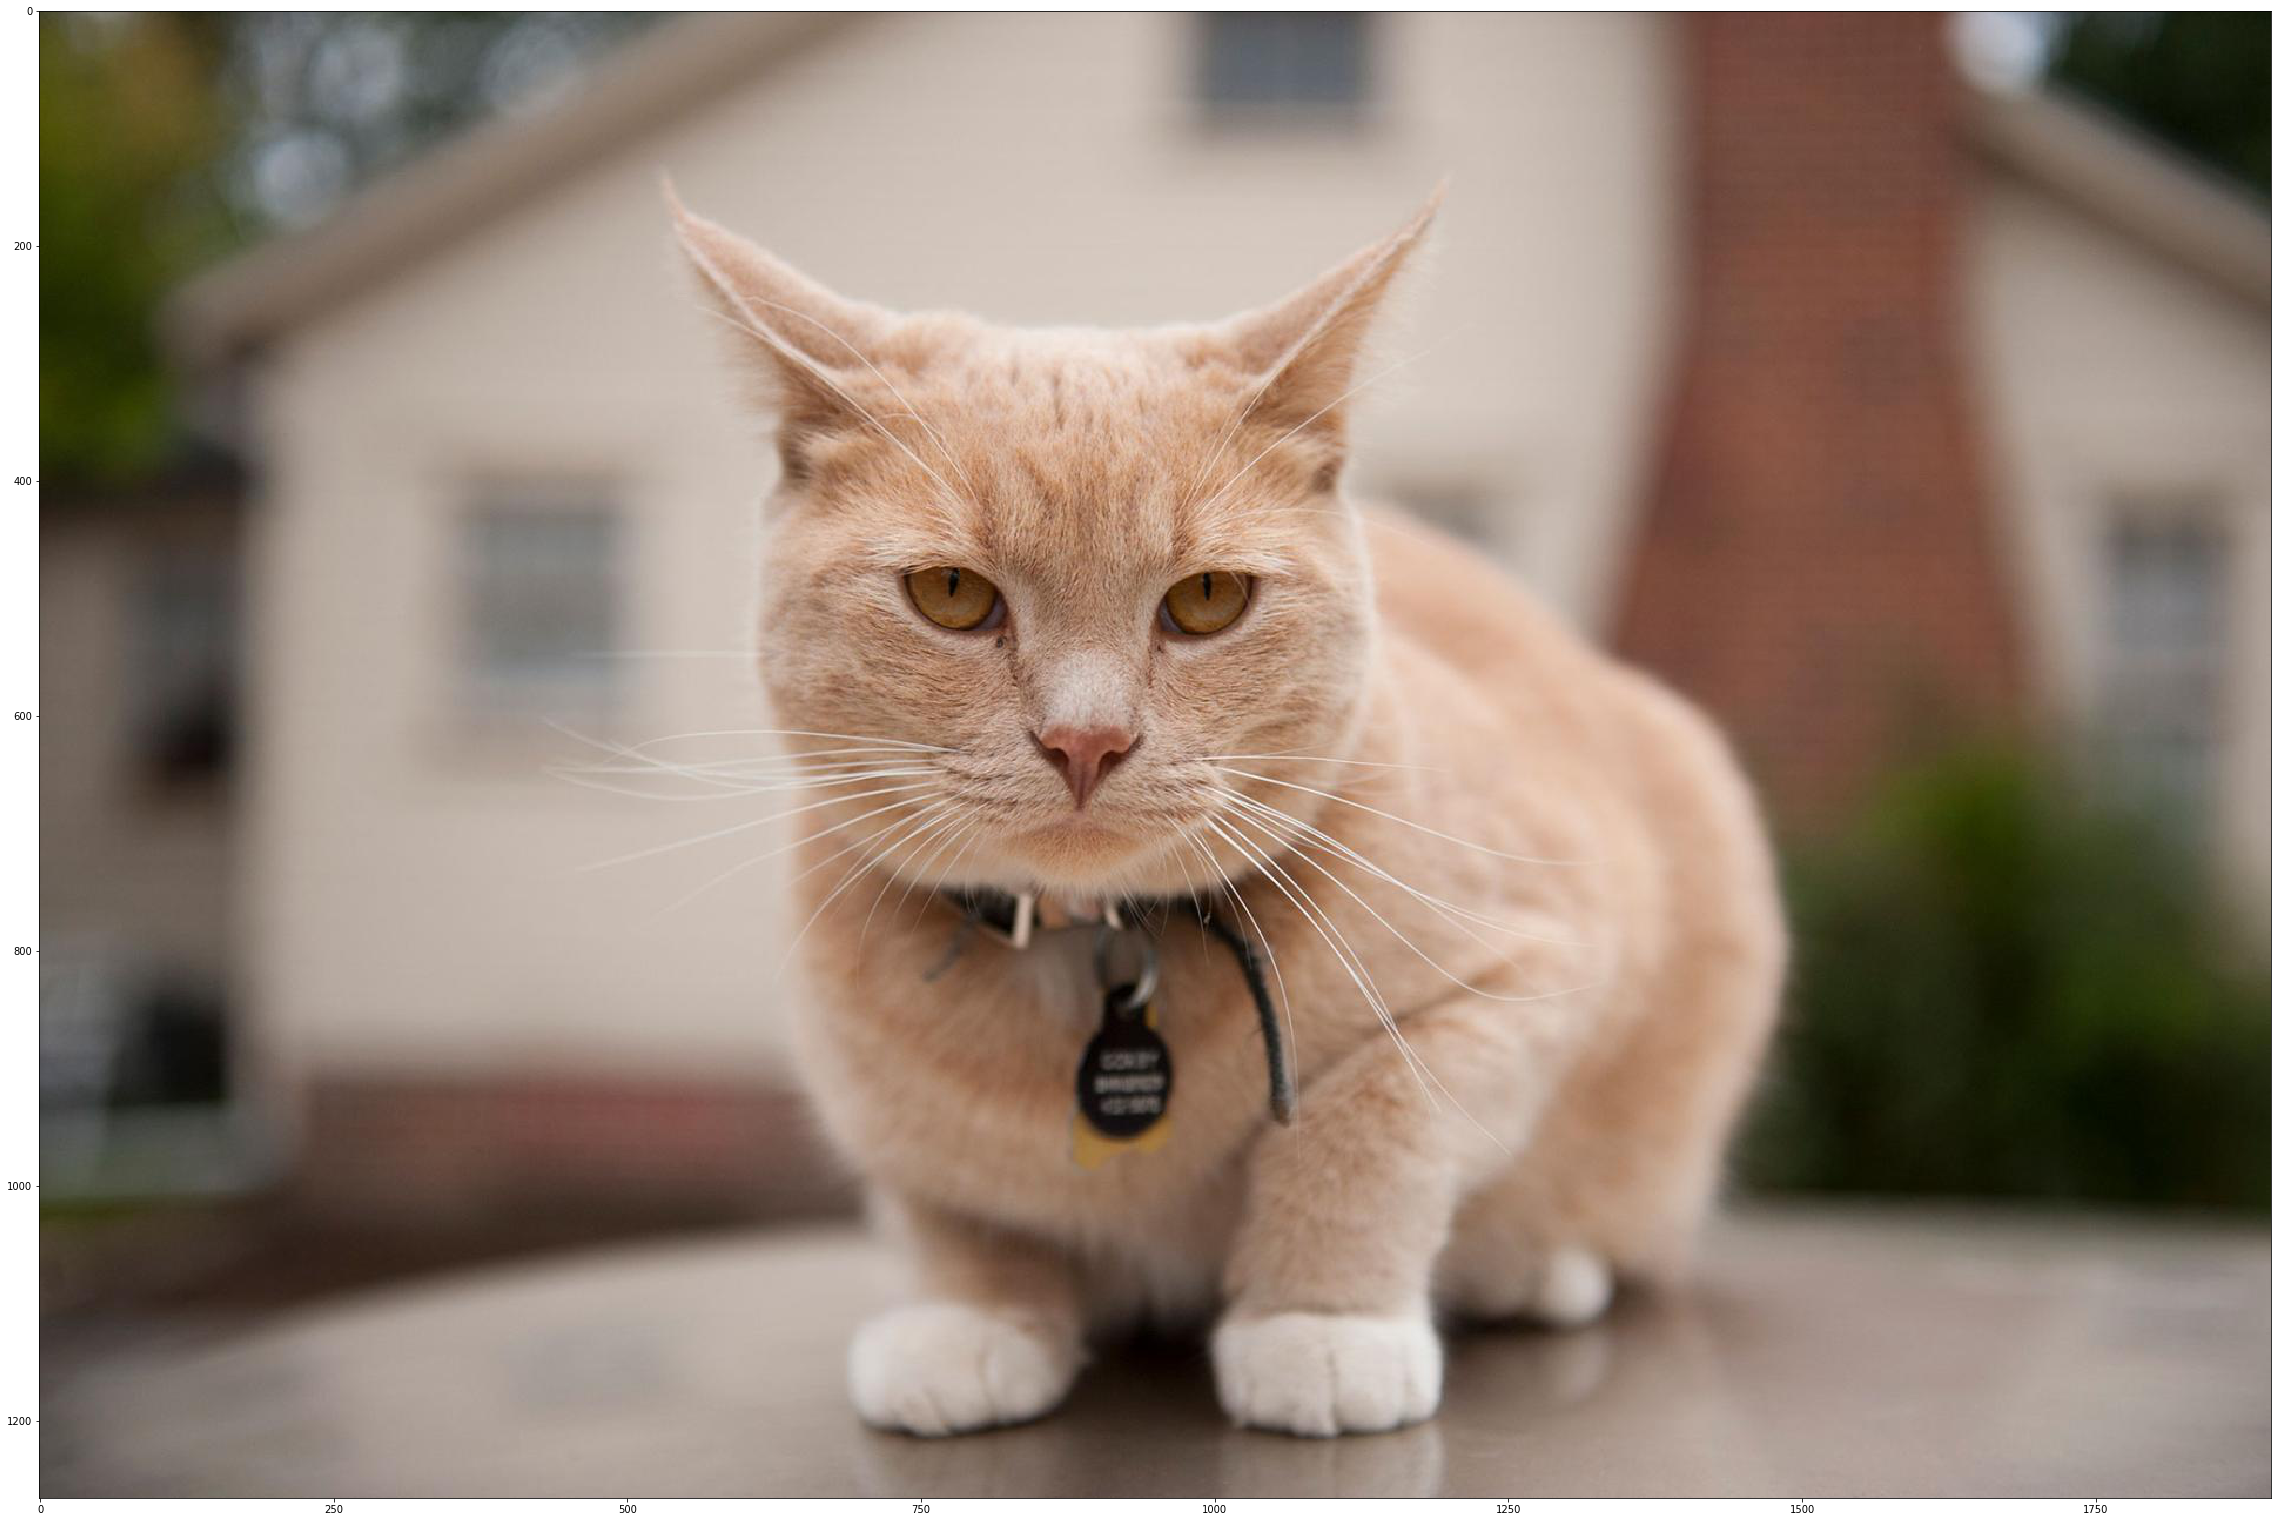

In [46]:
my_image = "pic1.jpg"
my_label_y = [1]
fname = 'images/' + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px, num_px)).reshape((num_px*num_px*3,1))
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")
